<a href="https://colab.research.google.com/github/RanjanRaj07/Data-Science-Internship/blob/main/Task3/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Segmentation
---
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis
---

In [ ]:
#unedrstanding more abou the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

So there are no null entries in the DataSet, Except gender all the DataFrame are integers.

In [ ]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Gender', ylabel='count'>

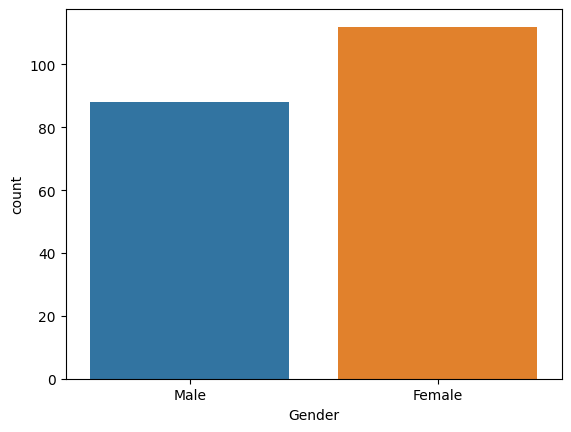

In [ ]:
#see the count of male and female customers
sns.countplot(x=df['Gender'])

we can observ there are more number of female customers.

### Insights on each data

Text(0.5, 1.0, 'Distribution of Age')

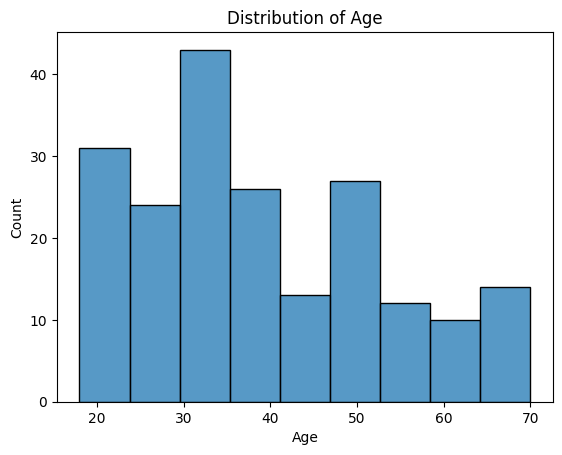

In [ ]:
#Distribution of age
sns.histplot(x=df['Age'])
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Income')

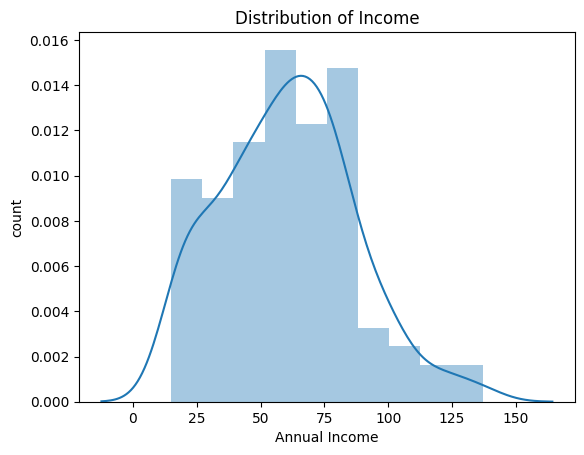

In [ ]:
#Distribution of Income
import warnings
warnings.filterwarnings('ignore')
sns.distplot(x=df['Annual Income (k$)'])
plt.xlabel('Annual Income')
plt.ylabel('count')
plt.title('Distribution of Income')

Text(0.5, 1.0, 'Distribution of Spending score')

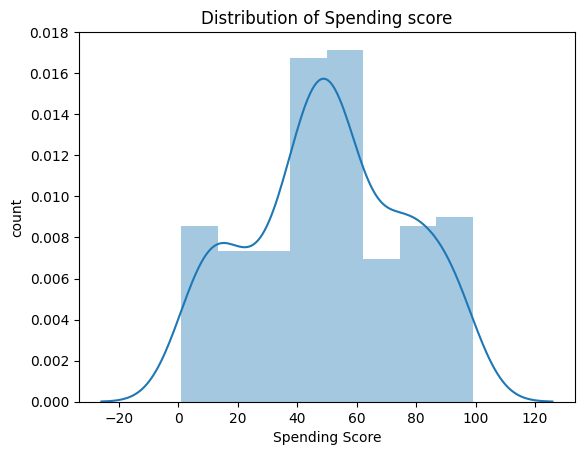

In [ ]:
#Distribution of Spending Score
sns.distplot(x=df['Spending Score (1-100)'])
plt.ylabel('count')
plt.xlabel('Spending Score')
plt.title('Distribution of Spending score')

as per the above distribution of spending score graph we can expect minmum 4 clustors of the customers.<br>
we should do segmentation based on Income and Spending, later we can check the clusters based on age and gender.

In [ ]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
#convert the gender to integer value
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['Gender'] = la.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# K-Means Clustering model (Unsupervised learning)
---

### Performing Elbow method to find the optimal number of clusters for the given dataset

In [ ]:
from sklearn.cluster import KMeans
wcss = [] #with in cluster sum of square

for each value of k we should calculate wcss, is the sum of square distance between each point and the centroid in a cluster. when we plot the wcss with the k values ,we obtain a elbow graph where as the value of k increases wcss value decreases.<br>

In [ ]:
no_cluster = []
wcss = []

In [ ]:
#consider preprocessing min clusters is 4 and max clusters is 10
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  no_cluster.append(i)
  wcss.append(kmeans.inertia_)

In [ ]:
pd.DataFrame(no_cluster, wcss)

,0
308862.060000,1
212889.442455,2
143391.592360,3
104414.675342,4
75399.615414,5
58348.641363,6
51147.017318,7
44355.313518,8
41552.914725,9


Text(0, 0.5, 'wcss')

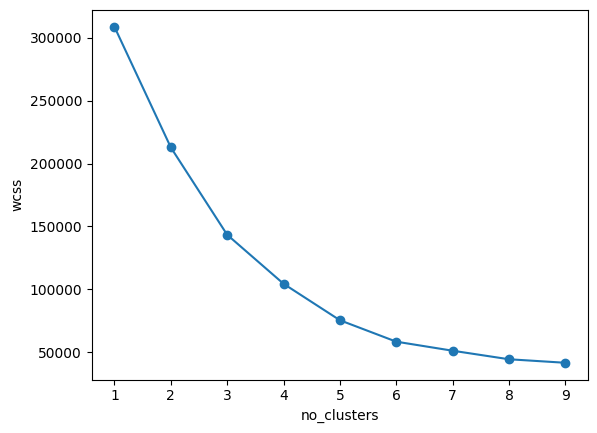

In [ ]:
plt.plot(no_cluster, wcss, marker='o')
plt.xlabel('no_clusters')
plt.ylabel('wcss')

By elbow method we can observe that optimal number of clusters in customers is ***5***

### KMeans model training

In [ ]:
model = KMeans(n_clusters=5)
model.fit(df)
pre = model.predict(df)

In [ ]:
df['KMeans'] = pre
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0


In [ ]:
group1=df[df['KMeans']==4]
group2=df[df['KMeans']==1]
group3=df[df['KMeans']==3]
group4=df[df['KMeans']==2]
group5=df[df['KMeans']==0]

Text(0, 0.5, 'Spending Score')

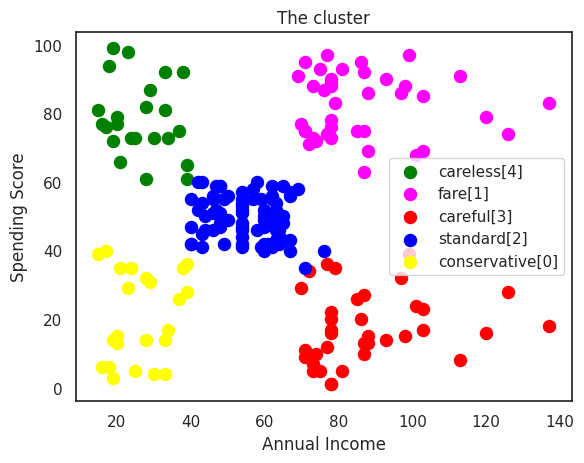

In [ ]:
plt.scatter(group1['Annual Income (k$)'],group1['Spending Score (1-100)'],s=75,c='green',label='careless[4]')
plt.scatter(group2['Annual Income (k$)'],group2['Spending Score (1-100)'],s=75,c='magenta',label='fare[1]')
plt.scatter(group3['Annual Income (k$)'],group3['Spending Score (1-100)'],s=75,c='red',label='careful[3]')
plt.scatter(group4['Annual Income (k$)'],group4['Spending Score (1-100)'],s=75,c='blue',label='standard[2]')
plt.scatter(group5['Annual Income (k$)'],group5['Spending Score (1-100)'],s=75,c='yellow',label='conservative[0]')
plt.legend()
plt.title('The cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [ ]:
df['KMeans'].value_counts()

2    79
1    39
3    36
0    23
4    23
Name: KMeans, dtype: int64

we can note that a maximum number of customers fall in 'standard' cluster (the class who have a decent Annual Income and spending score) so they are the target customers.

<Axes: xlabel='KMeans', ylabel='count'>

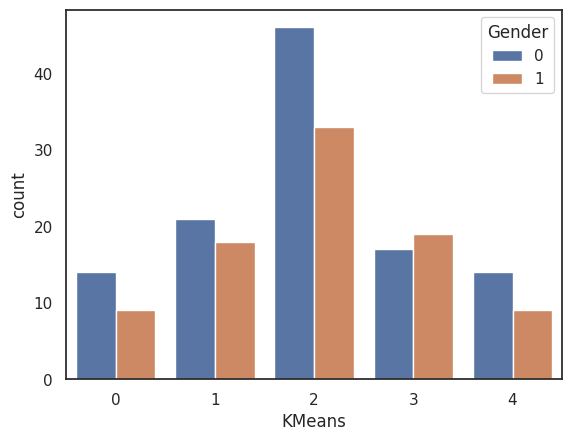

In [ ]:
#gender distribution in each clusters
sns.countplot(df,x='KMeans',hue='Gender')

<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

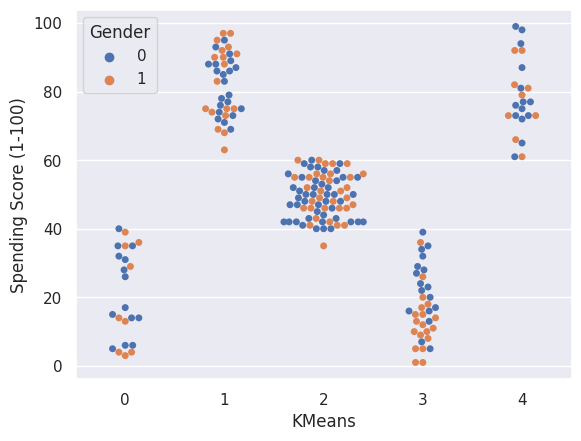

In [ ]:
sns.swarmplot(data=df, x="KMeans", y="Spending Score (1-100)",hue='Gender')

in the given data set we can find that male customers are only more than female customers only in cluster Careful[3] (customers with more income and less spending score)

<Axes: ylabel='KMeans'>

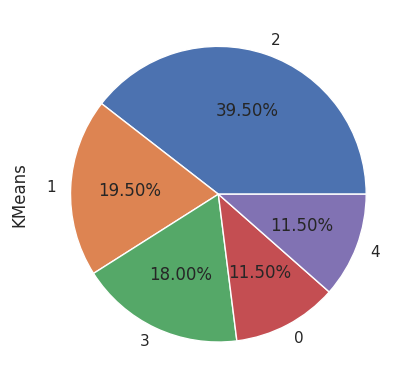

In [ ]:
#customer distribution pie chart
df['KMeans'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

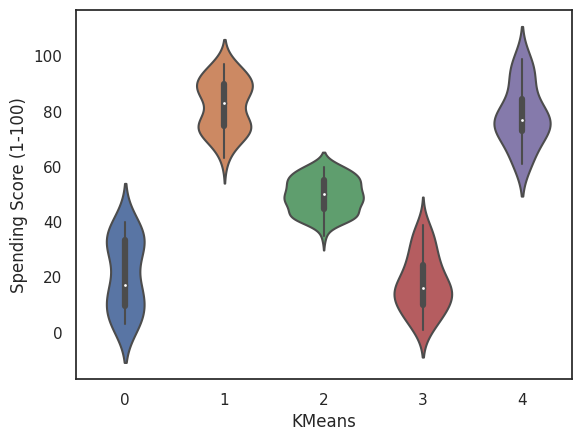

In [ ]:
sns.violinplot(data=df, x="KMeans", y="Spending Score (1-100)")

<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

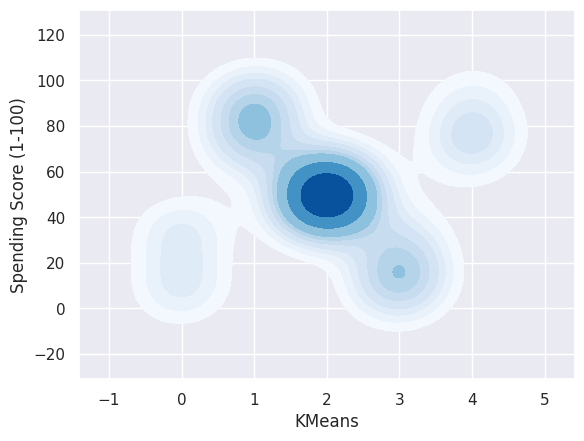

In [ ]:
sns.set_theme(style="darkgrid")

sns.kdeplot(data=df,x='KMeans',y='Spending Score (1-100)',thresh=.1,cmap='Blues',fill =True)

we can not that customers of cluster standard[3] have the largest density with spending score 40 to 60.

# Conclusion
---
I can conclude the analysis on the data set for customer segmentation that,<br>
- customers with decent income and decent spending score is majority in numnber<br>
- male customers are exceed the female customer count only in careful cluster.

therefore we can understand the customers, who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.